In [26]:
import math
import numpy
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import Callback
import os
import cv2 as cv
import matplotlib.pyplot as plt
from Citra import Citra

In [32]:
class StopLearning(Callback):
    
    def __init__(self, X, Y):
        super(Callback, self).__init__()
        self.X = X
        self.Y = Y
    
    def on_epoch_end(self, epoch, logs = {}):
        loss, acc = self.model.evaluate(self.X, self.Y, verbose = 0)
        print('Akurasi : ' + str(acc * 100) + '\n')
        
        if acc > 0.99:
            self.model.stop_training = True
            
        if acc >= 0.9:
            self.model.save('hasil learning/v2/Model NN ' + str(acc * 100) + '.h5')
            print("Saved model to disk\n")
            
def getTrainingData(path, label):
    trainImages = []
    
    for file in os.listdir(path):
        if file == 'desktop.ini' or file == '.ipynb_checkpoints':
            continue
            
        filePath = os.path.join(path, file)
        img = Citra(cv.imread(filePath))
        img.resize((128, 128))
        trainImages.append([img.getHistogram(), label])
        
    return numpy.array(trainImages)

In [29]:
k1 = getTrainingData('data/Dataset/v2/1', [1 ,0, 0, 0])
k2 = getTrainingData('data/Dataset/v2/2', [0, 1, 0, 0])
k3 = getTrainingData('data/Dataset/v2/3', [0, 0, 1, 0])
k4 = getTrainingData('data/Dataset/v2/4', [0, 0, 0, 1])
training_images = numpy.concatenate((k1, k2, k3, k4), axis = 0)
training_data = numpy.array([i[0] for i in training_images])
training_label = numpy.array([i[1] for i in training_images])

In [33]:
# 1. define the network
model = Sequential()
model.add(Dense(550, input_dim=768, activation='sigmoid'))
model.add(Dense(400, input_dim=550, activation='sigmoid'))
model.add(Dense(150, input_dim=400, activation='sigmoid'))
model.add(Dense(4, input_dim=150, activation='softmax'))
# 2. compile the network
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
# 3. fit the network
history = model.fit(training_data, training_label, epochs = 100, batch_size = 50, verbose = 0, callbacks = [StopLearning(training_data, training_label)])
# 4. evaluate the network
loss, accuracy = model.evaluate(training_data, training_label)
print("\nLoss: %.2f, Accuracy: %.2f%%" % (loss, accuracy*100))
# 5. make predictions
probabilities = model.predict(training_data)
# print(probabilities)
predictions = numpy.argmax(probabilities, axis=1)
# print(predictions)
accuracy = numpy.mean(predictions == numpy.argmax(training_label, axis=1))
print("Prediction Accuracy: %.2f%%" % (accuracy*100))

Akurasi : 24.583333333333332

Akurasi : 22.916666666666664

Akurasi : 48.75

Akurasi : 51.24999999999999

Akurasi : 54.58333333333333

Akurasi : 58.75

Akurasi : 57.08333333333333

Akurasi : 55.00000000000001

Akurasi : 54.58333333333333

Akurasi : 52.916666666666664

Akurasi : 53.75

Akurasi : 54.58333333333333

Akurasi : 56.25

Akurasi : 56.666666666666664

Akurasi : 51.24999999999999

Akurasi : 54.58333333333333

Akurasi : 62.083333333333336

Akurasi : 55.41666666666667

Akurasi : 52.083333333333336

Akurasi : 58.75

Akurasi : 56.25

Akurasi : 55.41666666666667

Akurasi : 56.25

Akurasi : 63.74999999999999

Akurasi : 54.166666666666664

Akurasi : 64.16666666666667

Akurasi : 64.58333333333334

Akurasi : 68.75

Akurasi : 63.33333333333333

Akurasi : 67.08333333333333

Akurasi : 65.83333333333333

Akurasi : 65.83333333333333

Akurasi : 65.83333333333333

Akurasi : 73.33333333333333

Akurasi : 69.16666666666667

Akurasi : 66.66666666666666

Akurasi : 65.41666666666667

Akurasi : 66.25


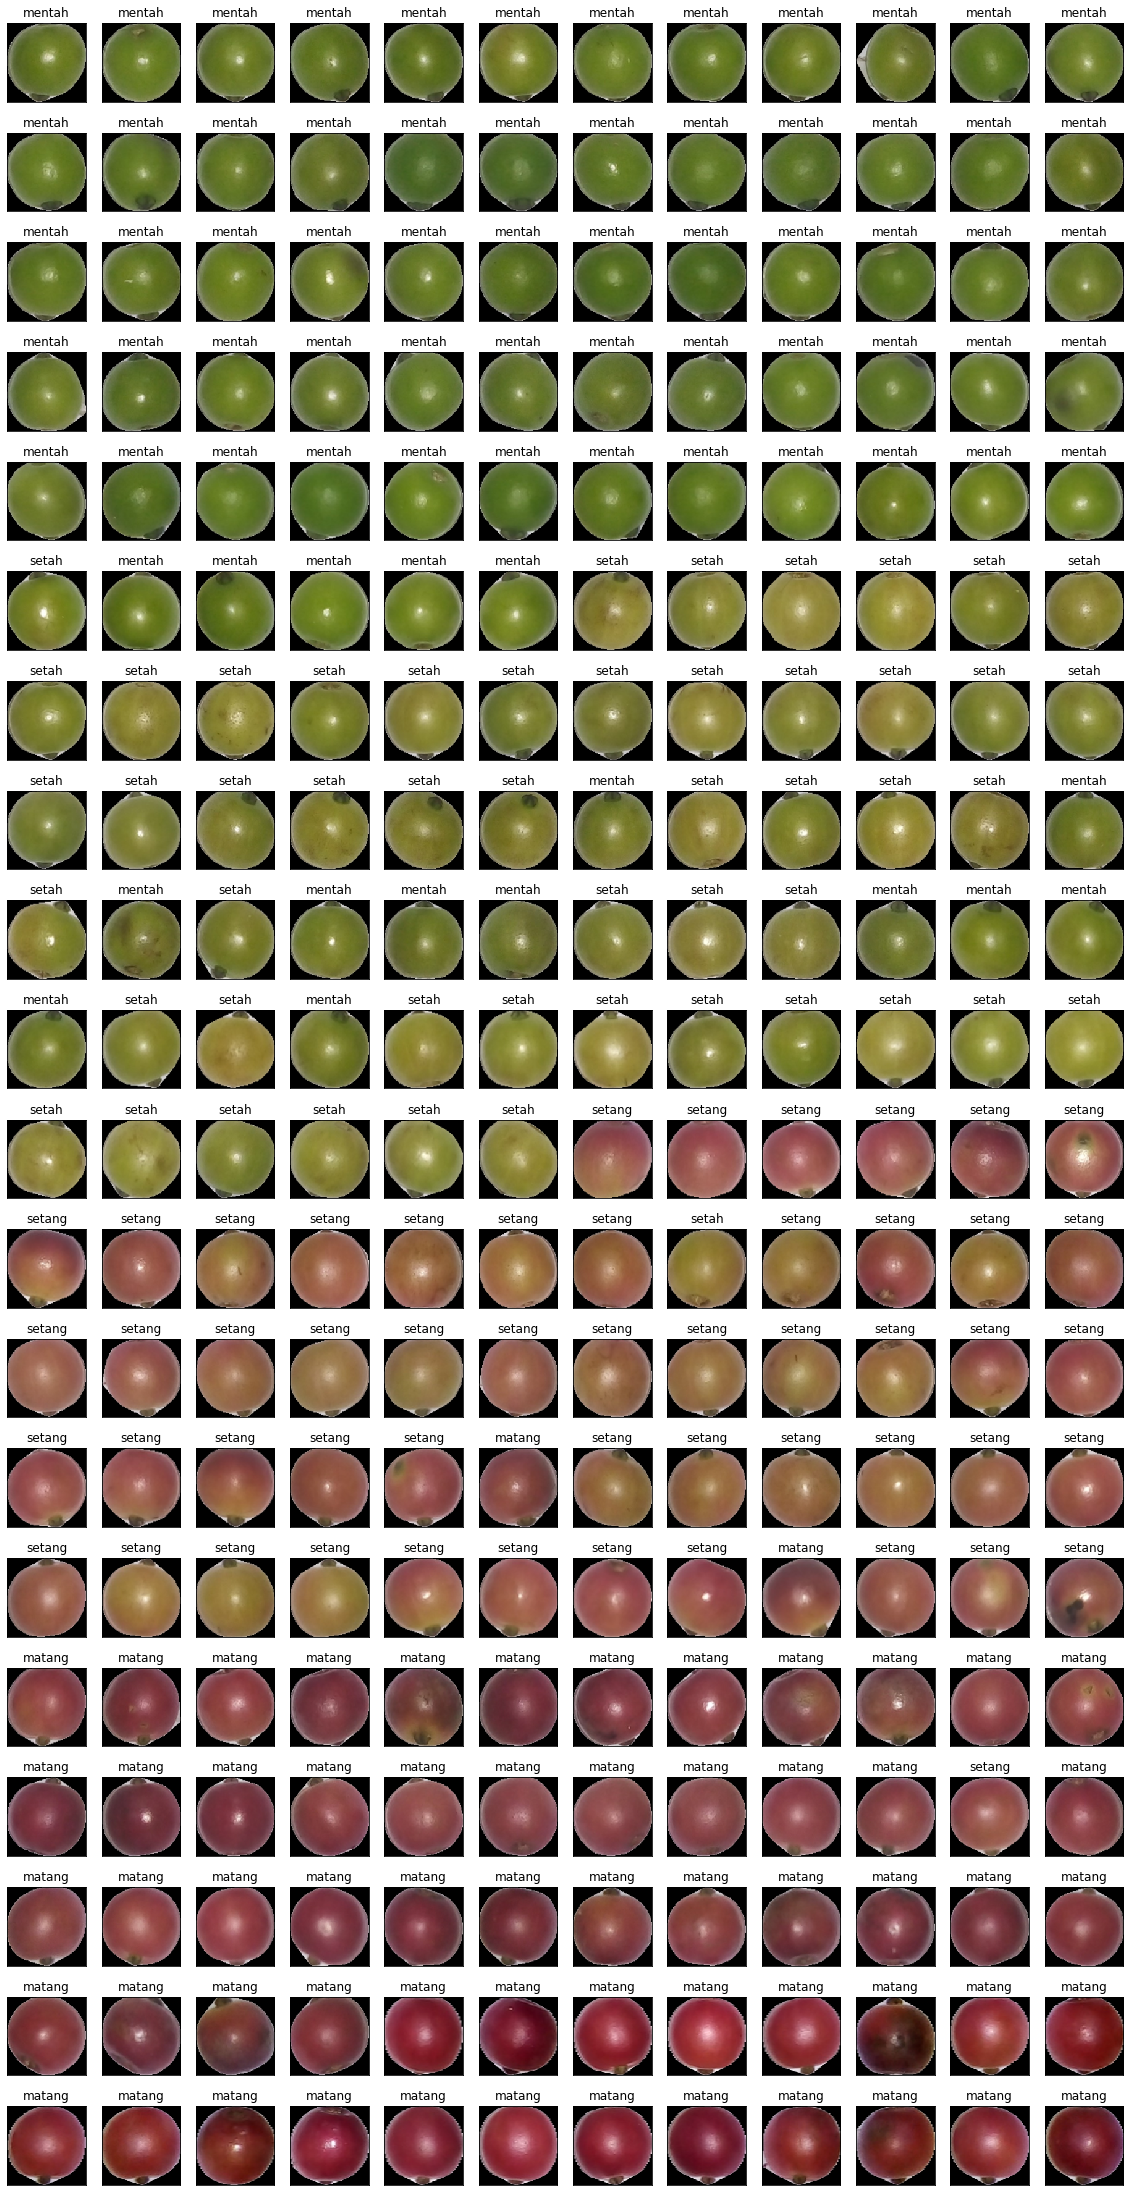

In [25]:
fig = plt.figure(figsize = (20, 40))
indeks = ['mentah', 'setah', 'setang', 'matang']

for counter, data in enumerate(testing_data):
    y = fig.add_subplot(20, 12, counter + 1)
    img = Citra(testing_data[counter])
    histogram = img.getHistogram()
    output = model.predict(numpy.array([histogram]))
    
    y.imshow(cv.cvtColor(testing_data[counter], cv.COLOR_BGR2RGB))
    plt.title(indeks[numpy.argmax(output)])
    y.axes.get_xaxis().set_visible(False)
    y.axes.get_yaxis().set_visible(False)